In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
from scipy import stats
import geopandas as gpd
import seaborn as sns
%matplotlib inline

In [2]:
rim = pd.read_csv('RiskInputModel.csv')

In [3]:
rim.head()

,Neighborhood,BusinessLossMetric,StaffCancellationMetric,VenuesPer1kMetric,OLS_PCT_Metric,VarietyMetric
0,Astoria/LIC,1.104798,0.333849,0.199923,-1.261206,0.598250
1,Bed-Stuy,0.725636,0.333849,-0.198551,1.005571,0.490202
2,Bed-Stuy/Bushwick,0.961647,0.333849,-0.592874,1.422584,0.042846
3,Williamsburg/Bushwick/Bed-Stuy,-0.549198,0.333849,-0.477378,1.046466,0.321021
4,Bushwick,0.673548,0.333849,-0.485231,0.885349,-0.694534


In [24]:
rim.VarietyMetric

0     0.598250
1     0.490202
2     0.042846
3     0.321021
4    -0.694534
5     1.121903
6     0.490202
7    -3.064004
8     0.161319
9    -0.102166
10    0.546595
11    0.433808
12    0.095448
13   -0.920107
14   -0.242913
15   -0.694534
16    1.416665
Name: VarietyMetric, dtype: float64

## Linear Model

In [4]:
lm = smf.ols(formula='VarietyMetric~BusinessLossMetric+StaffCancellationMetric+VenuesPer1kMetric+OLS_PCT_Metric', data = rim).fit()

In [5]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          VarietyMetric   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.289
Date:                Fri, 19 Jun 2020   Prob (F-statistic):              0.328
Time:                        22:30:44   Log-Likelihood:                -20.569
No. Observations:                  17   AIC:                             51.14
Df Residuals:                      12   BIC:                             55.30
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5

/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [ ]:
# all of these p values are > 0.05 so we can't reject the null hypothesis (null hypothesis = coefficient is equal to zero, aka no effect)

In [8]:
rim.columns

Index(['Neighborhood', 'BusinessLossMetric', 'StaffCancellationMetric',
       'VenuesPer1kMetric', 'OLS_PCT_Metric', 'VarietyMetric'],
      dtype='object')

## Correlation Matrix

                         BusinessLossMetric  StaffCancellationMetric  \
BusinessLossMetric                 1.000000                 0.669274   
StaffCancellationMetric            0.669274                 1.000000   
VenuesPer1kMetric                  0.325610                 0.155764   
OLS_PCT_Metric                     0.134923                 0.316874   

                         VenuesPer1kMetric  OLS_PCT_Metric  
BusinessLossMetric                0.325610        0.134923  
StaffCancellationMetric           0.155764        0.316874  
VenuesPer1kMetric                 1.000000       -0.018434  
OLS_PCT_Metric                   -0.018434        1.000000  


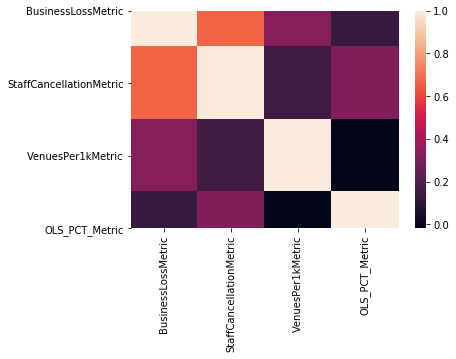

In [7]:
#creating a data frame with only the columns requested for the correlation matrix
input_features = rim.filter(['BusinessLossMetric', 'StaffCancellationMetric','VenuesPer1kMetric', 'OLS_PCT_Metric'], axis=1)
input_features.head()

#Q2 Solution

#correlation matrix for the requested columns


corr = input_features.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


#corr = REStaten_.corr(REStaten.LAND_SQUARE_FEET, )
#corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

print(input_features.corr())

## Predictions & Plot

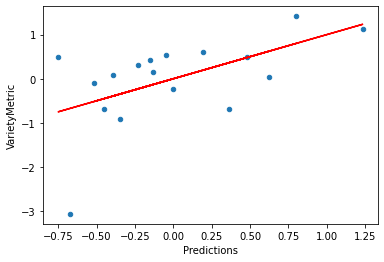

In [11]:
#creating predicted values for regression plot
rim['Predictions'] = lm.predict()

rim[['VarietyMetric','Predictions']].head()

#Q3 Solution

#Plotting the multi-variate regression
fig, ax = plt.subplots() #get axis to plot on
#ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
#REStaten_.plot(x='LAND_SQUARE_FEET',y='SALE_PRICE',kind='scatter', logx=True, logy=True)
rim.plot(ax=ax,kind='scatter',x='Predictions',y='VarietyMetric') #show the data
ax.plot(rim.Predictions,rim.Predictions,'r-'); #show the regression line

## Christine edits

In [8]:
# learned in summer ML that you want to look at the correlation of ea feature AND target. 
# There's an argument for disregarding features w low correlation w target variable and it's recommended to drop features that are highly correlated w each other, e.g. business loss and staff cancelations. 

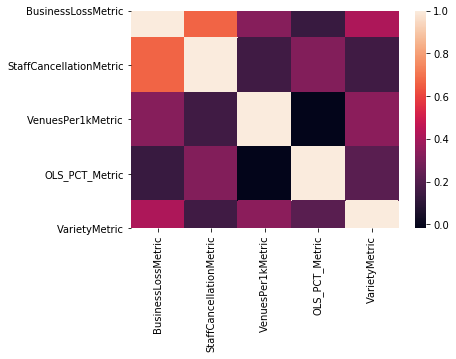

In [10]:
# full correlation matrix
corr = rim.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# based on these results, trying a linear regression without staff cancellations

In [11]:
lm_2 = smf.ols(formula='VarietyMetric~BusinessLossMetric+VenuesPer1kMetric+OLS_PCT_Metric', data = rim).fit()

In [12]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:          VarietyMetric   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.469
Date:                Fri, 19 Jun 2020   Prob (F-statistic):              0.269
Time:                        22:56:59   Log-Likelihood:                -21.125
No. Observations:                  17   AIC:                             50.25
Df Residuals:                      13   BIC:                             53.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.551e-17      0

In [17]:
# compare to sklearn's linear regression
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(rim[['BusinessLossMetric', 'StaffCancellationMetric','VenuesPer1kMetric', 'OLS_PCT_Metric']],rim['VarietyMetric'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# same coefficients as statsmodels
lr.coef_

array([ 0.51793727, -0.30826372,  0.22293413,  0.25199882])

In [23]:
# R2 value
lr.score(rim[['BusinessLossMetric', 'StaffCancellationMetric','VenuesPer1kMetric', 'OLS_PCT_Metric']],rim['VarietyMetric'])

0.3004772238064696

### Statsmodels linear regression without neighborhood 7 (outlier)

In [26]:
rim_without7 = rim.drop([0,7])

In [28]:
rim_without7

,Neighborhood,BusinessLossMetric,StaffCancellationMetric,VenuesPer1kMetric,OLS_PCT_Metric,VarietyMetric
1,Bed-Stuy,0.725636,0.333849,-0.198551,1.005571,0.490202
2,Bed-Stuy/Bushwick,0.961647,0.333849,-0.592874,1.422584,0.042846
3,Williamsburg/Bushwick/Bed-Stuy,-0.549198,0.333849,-0.477378,1.046466,0.321021
4,Bushwick,0.673548,0.333849,-0.485231,0.885349,-0.694534
5,Chelsea,1.318044,0.333849,3.484530,-0.488772,1.121903
6,Elmhurst,-0.289247,0.333849,-0.732791,-1.324911,0.490202
8,Greenpoint,-1.050006,0.333849,0.517974,1.584178,0.161319
9,Harlem,-0.777677,0.333849,-0.520137,0.425367,-0.102166
10,Inwood,0.442643,0.333849,-0.538435,-0.213008,0.546595
11,Jackson Heights,-0.001058,0.333849,-0.137493,-0.075851,0.433808


In [29]:
lm_3 = smf.ols(formula='VarietyMetric~BusinessLossMetric+StaffCancellationMetric+VenuesPer1kMetric+OLS_PCT_Metric', data = rim_without7).fit()

In [31]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:          VarietyMetric   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.227
Date:                Fri, 19 Jun 2020   Prob (F-statistic):              0.359
Time:                        23:40:00   Log-Likelihood:                -11.225
No. Observations:                  15   AIC:                             32.45
Df Residuals:                      10   BIC:                             35.99
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


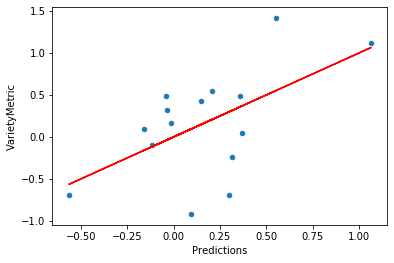

In [32]:
#creating predicted values for regression plot
rim_without7['Predictions'] = lm_3.predict()

rim_without7[['VarietyMetric','Predictions']].head()

#Q3 Solution

#Plotting the multi-variate regression
fig, ax = plt.subplots() #get axis to plot on
#ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
#REStaten_.plot(x='LAND_SQUARE_FEET',y='SALE_PRICE',kind='scatter', logx=True, logy=True)
rim_without7.plot(ax=ax,kind='scatter',x='Predictions',y='VarietyMetric') #show the data
ax.plot(rim_without7.Predictions,rim_without7.Predictions,'r-'); #show the regression line